# CONVOLUCIÓN - Ejercicio 1: 
  Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud N muestras. Compare los resultados con los obtenidos mediante la función conv(x,y) y con la función filter. La función Y = filter(B,A,X) implementa la ecuación en diferencias, para los coeficientes dados en los vectores A y B y la señal de entrada X, según:
        a(1)*y(n) = b(1)*x(n) + b(2)*x(n-1) + ... - a(2)*y(n-1) - ...
 A partir de esto, determine los valores a ingresar en los vectores A y B para obtener la salida esperada.

 *La **convolucion** es la forma natural de comportarse de un sistema lineal e invariante en el tiempo como respuesta a un estimulo de entrada $\to y(t) = x(t)*h(t)$ en donde la secuencia $y[n]$ es la salida de un sistema LTI a la entrada represebtada por $x[n]$ y una respuesta al impulso $h[n]$, la entrada puede expresarse como sumatoria de secuencias impulsos desplazados escalados, de forma que $x[n] = x_0[n] + x_1[n] + x_2[n] + ...$*

 *La **deconvolucion** es que si nos dan la señal resultante y conozco el filtro que se aplica y quiero recuperar la señal original. Eso es deconvolucionar. Sirve por ejemplo con imagenes borrosas. Si sabes con que tipo de desenfoque se saca la foto podemos deconovolucionar para recuperar la imagen nitida. Es mas jodida porque hay perdida de informacion a veces*

 **Funcion Filter:** La funcion filter implementa una ecuacion en diferencias lineal del tipo
 $$a(1)y[n] + a(2)y[n-1]+... = b(1)x[n] + b(2)x[n-1] + ...$$
 O en notacion mas clara
 $$y[n] = \frac{b(1)x[n]+b(2)x[n-1]+b(3)x[n-2]+...}{a(1)}-\frac{a(2)y[n-1]+a(2)y[n-2]+...}{a(1)}$$
 Entonces:
 * B(Numerador) tiene los coeficientes aplicados a la entrada $x[n] \to $ define la **respuesta al impulso** del sistema FIR (Si A es 1).
 * A(denominador) tiene los coeficientes aplicados a la salida $y[n] \to $ define el **componente recursivo** (solo necesario para sistemas IIR).

 **Por que A = [1]**
 Cuando hacemos una **convolucion** estamos trabajando con un sistema FIR. Es decir
 $$y[n] = \sum_{k = 0}^{M}b[k]x[n-k]$$
 lo que equivale a
 * B = la respuesta al impulso $h[n]$
 * A = [1] $\to$ sin terminos recursivos porque la salida no depende de las salidas pasadas

 **Por que Lfilter y np.convolve dan salidas de distinta longitud?**
 * np.convolve
  1. convolve calcula toda la convolucion, desde el primer instante en que las señales empiezan a "tocarse", hasta el ultimo.
  2. Longitud $len(x) + len(h) - 1$
* lfilter
  1. Calcula la salida del sistema causal a partir del instante cero
  2. Longitud $len(x)$ porque la salida se computa desde $n = 0$ hasta $n = len(x) - 1$

Para que entreguen el mismo resultado tanto *lfilter* como *convolve* tanto en longitud como en contenido debemos extener la señal de entrada x con ceros al final de manera que permita que toda la respuesta al impulso *entre en juego*

Salida sumatoria de convolucion:  [2.  5.  6.5 3.  1. ]
Salida convolve:  [2.  5.  6.5 3.  1. ]
Salida lfilter:  [2.  5.  6.5 3.  1. ]


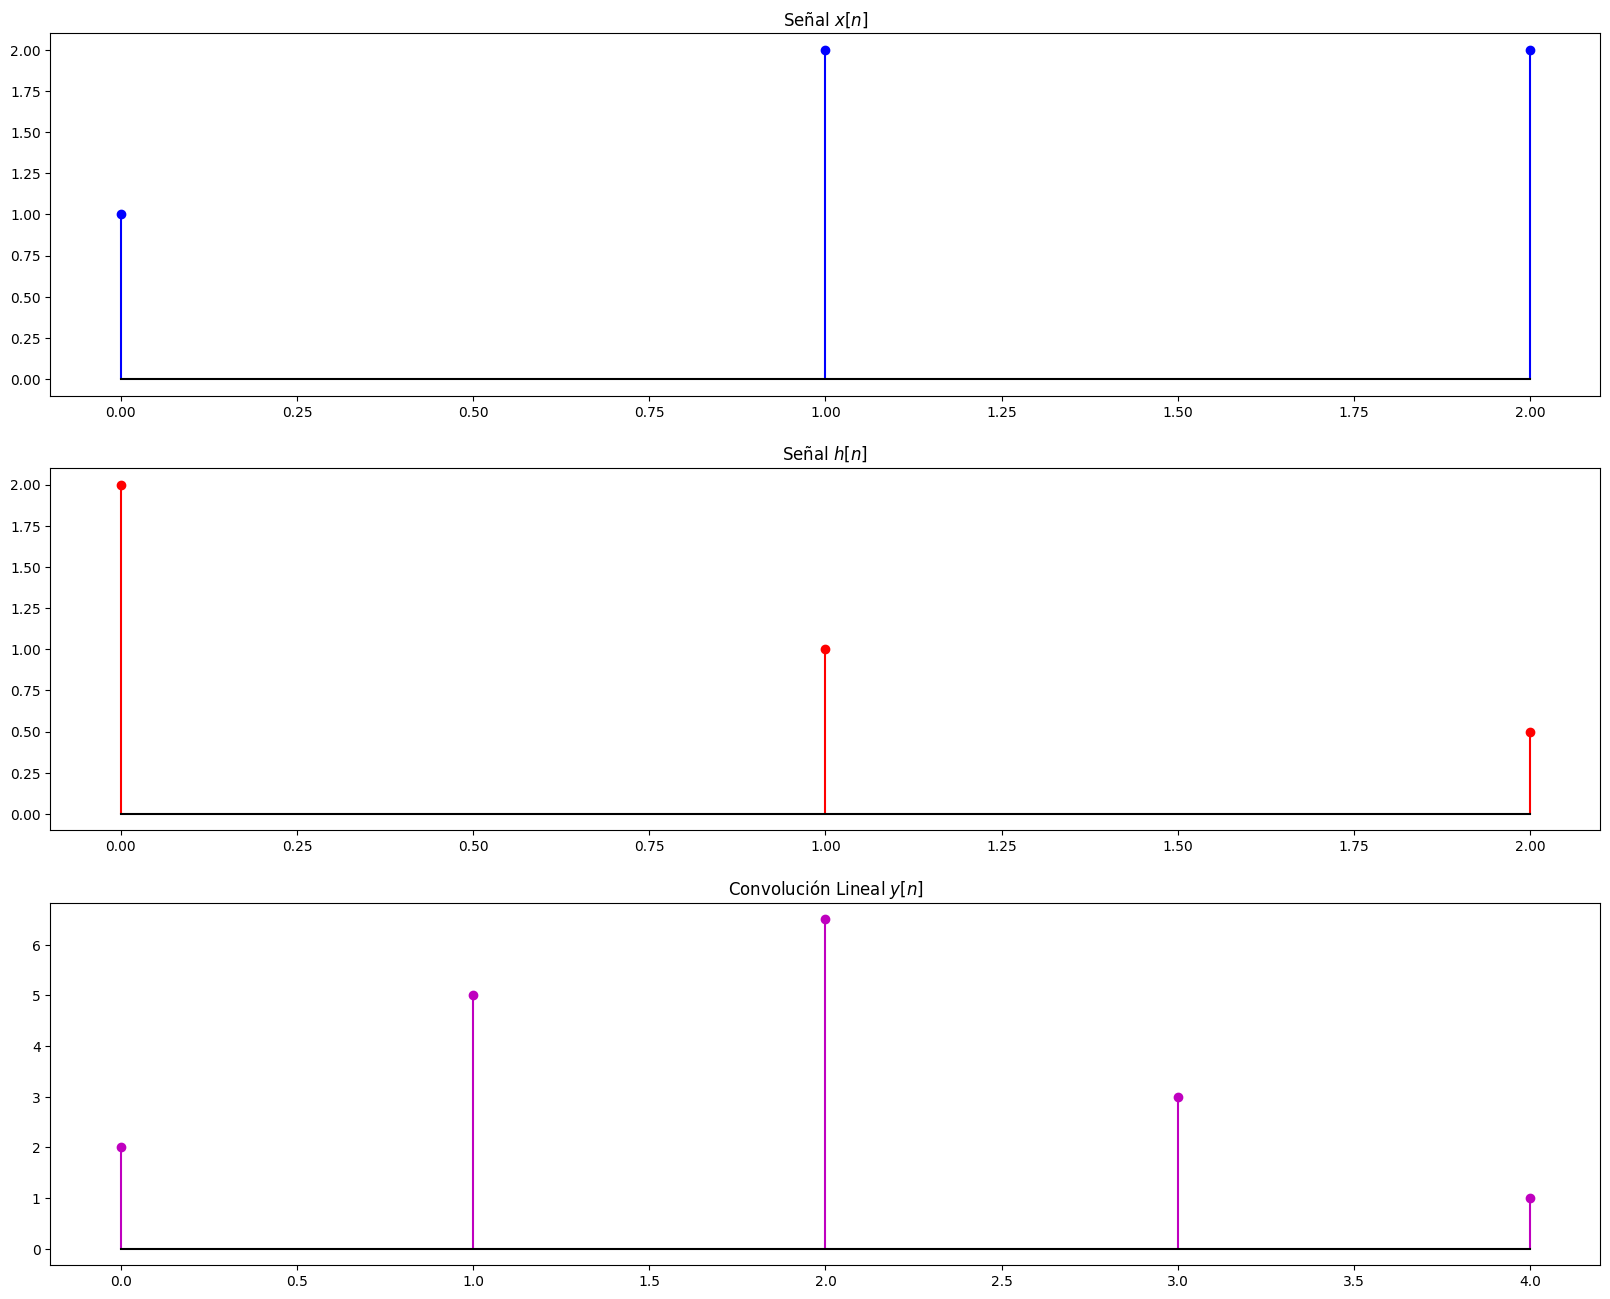

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

x = np.array([1, 2, 2])
h = np.array([2, 1,0.5])
y = np.zeros(len(x) + len(h) - 1)
#Convolución Lineal
for i in range(len(x)):
    for j in range(len(h)):
        y[i + j] += x[i] * h[j]
print("Salida sumatoria de convolucion: ",y)
print("Salida convolve: ",np.convolve(x,h))
x_padded = np.pad(x, (0, len(h)-1), 'constant')  # Toma los valores de x y rellena con ceros a la derecha
print("Salida lfilter: ",lfilter(h,[1],x_padded))

plt.figure(figsize=(20,16))
plt.subplot(3,1,1)
plt.stem(x,  basefmt='k', linefmt='b-', markerfmt='bo')
plt.title("Señal $x[n]$")
plt.subplot(3,1,2)
plt.stem(h,  basefmt='k', linefmt='r-', markerfmt='ro')
plt.title("Señal $h[n]$")
plt.subplot(3,1,3)
plt.stem(y, basefmt='k', linefmt='m-', markerfmt='mo')
plt.title("Convolución Lineal $y[n]$")
plt.show()

filter(B, A, X):
* B: Coeficientes $ b_k$. Son los que acompañan a las entradas $x[n-k]$, es decir, definen el **numerador** del sistema. En el caso de filtros FIR (como la convolución), estos coeficientes corresponden a la **respuesta al impulso** $h[n]$.
* A: Coeficientes $a_k$. Son los que acompañan a las salidas anteriores $y[n-k]$, es decir, definen el **denominador** del sistema (parte recursiva). 
Para un sistema FIR como en la convolución, se toma:
  
  $ A = [1]$
Esto implica que no hay términos de realimentación (recursivos), solo se considera el valor presente $y[n]$ , es decir:  
  $y[n] = b[0]x[n] + b[1]x[n-1] + \ldots + b[M]x[n-M]$

- X: Señal de entrada $x[n]$, que puede ser una señal cualquiera.  
  Para que la salida de `lfilter(B, A, X)` coincida con la salida completa de la **convolución lineal** entre `x` y `h`, es necesario **extender X** con ceros al final:
  longitud de X: `len(x) + len(h) - 1`

# Convolucion con metodo matricial
Hacemos la funcion de convolucion con el metodo matricial

In [20]:
import numpy as np

def matriz_convolucion(h,M):
    #Creo una matriz de ceros
    N = len(h)
    output_len = M+N - 1
    matriz = np.zeros((output_len,M))

    for i in range(output_len):
        for j in range(M):
            if 0 <= (i - j) < N:
                matriz[i,j] = h[i-j]

    return matriz

def convolucion(x,matriz):
    return matriz @ x

x = np.array([1, 2, 2])
h = np.array([2, 1, 0.5])
N = len(x)

matriz = matriz_convolucion(h,N)

print("Convolucion calculado con el metodo matricial")
print(matriz@x)

print("Convolucion calculado con la funcion convolve")
print(np.convolve(x,h))


Convolucion calculado con el metodo matricial
[2.  5.  6.5 3.  1. ]
Convolucion calculado con la funcion convolve
[2.  5.  6.5 3.  1. ]


<hr>

# Convolucion Circular
Escriba una funcion que realice la convolucion circular discreta (tambien llamada convolucion periodica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud N muestras, utilizando ciclos for. En esta se debe considerar a $x[n]$ periodica, pero $h[n]$ debe ser nula por fuera de su rango de definicion.
La convolucion circular podemos expresarla mediante la siguiente ecuacion

$y[k] = \sum_{l = 1}^N h[l]x[((N+k - 1)mod N) + 1]$

para $1 \leq k \leq N$, donde mod es la operacion modulo entero (resto de la division entera)

La convolucion circular es una operacion *similar* a la lineal, pero se hace como si las señales fueran "circulares", o sea, como si se repitieran en un loop sin fin. Se suele usar con señales de longitud fija.

A diferencia de la lineal en la que una es la señal, la otra el filtro y agarramos el filtro, lo invierto y lo desplazo a la derecha, multiplico y sumo. Cuando nos pasamos del final de la señal metemos ceros. En la **circular** cuando nos pasamos volvemos al principio.

In [20]:
import numpy as np

def convolucion_circular(x,h):
    N = len(x)
    M = len(h)
    
    if M != N:
        raise ValueError("Las señales x y h tienen que tener la misma longitud")
    
    y = np.zeros(N)

    for k in range(N-1):  #Para cada punto de salida y[k]
        suma = 0
        for l in range(N-1):  #Suma sobre todos los l
            # Calculamos el indice circular para x
            indice_x = ((N + k - l )%N)
            suma += h[l]*x[indice_x]

        y[k] = suma
    return y


x = np.array([1, 2, 3, 4])
h = np.array([1, 0, -1, 0])

# Convolución circular
resultado = convolucion_circular(x, h)
print("Resultado de la convolución circular:", resultado)

Resultado de la convolución circular: [-2. -2.  2.  0.]


# CONVOLUCIÓN - Ejercicio 3
Considere dos sistemas LTI conectados en cascada (Figura 2), con respuestas al impulso dadas por $h_A[n] = \sin(8n)$ y $h_B[n] = a^n$, donde $a ∈ R$, $|a| < 1$ y $0 ≤ n ≤ N − 1$, con $N$ el número de muestras distintas de cero. Obtenga N muestras de las respuestas al impulso, $h_A$ y $h_B$, según las definiciones dadas, y determine la salida $y[n]$ para una entrada $x[n] = δ[n] −aδ[n− 1]$, siendo $δ[n]$ es la función de impulso unitario. Luego invierta el orden de conexión de los sistemas y vuelva a calcular la salida. Compare con la salida obtenida originalmente.

Como los dos sistemas LTI el resultado **no deberia** cambiar al invertir el orden.

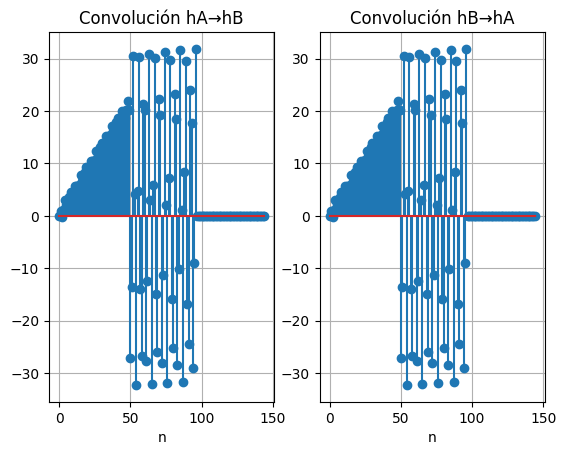

Los dos resultados son iguales, por lo que la convolución es conmutativa


In [ ]:
#El objetivo de este ejercicio es ver si la convolucion es conmutativa.
import numpy as np
import matplotlib.pyplot as plt

def ha(x):
    y = np.sin(8*x)
    return y

def hb(x,a):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = 1/x[i]
        x[i] = np.power(a,x[i])
    return x

a = 0.7
N = 50
x = np.arange(0,N-1,1)
x[0] = 1
x[1] = -a   #Esto sale de calcular la entrada con la funcion impulso unitario del enunciado
n = np.arange(0,len(x),1)

ha = ha(n)
hb = hb(n,a)

#x[n] y ha[n] -> wa
wa = np.convolve(x,ha)
#Ahora wa es entrada con hb
resB = np.convolve(wa,hb)

#Ahora primero B y despues A
wb = np.convolve(x,hb,)
resA = np.convolve(wb,ha)

fig, axs = plt.subplots(1, 2)
axs[0].stem(np.arange(len(resA)), resA)
axs[0].grid()
axs[0].title.set_text('Convolución hA→hB')
axs[0].set_xlabel('n')

axs[1].stem(np.arange(len(resB)), resB)
axs[1].grid()
axs[1].title.set_text('Convolución hB→hA')
axs[1].set_xlabel('n')

plt.show()

if np.allclose(resA, resB):
    print("Los dos resultados son iguales, por lo que la convolución es conmutativa")
else:
    print("Los resultados son distintos, la convolución no parece ser conmutativa")



[0. 0. 0. 0. 0. 0. 0. 0.]


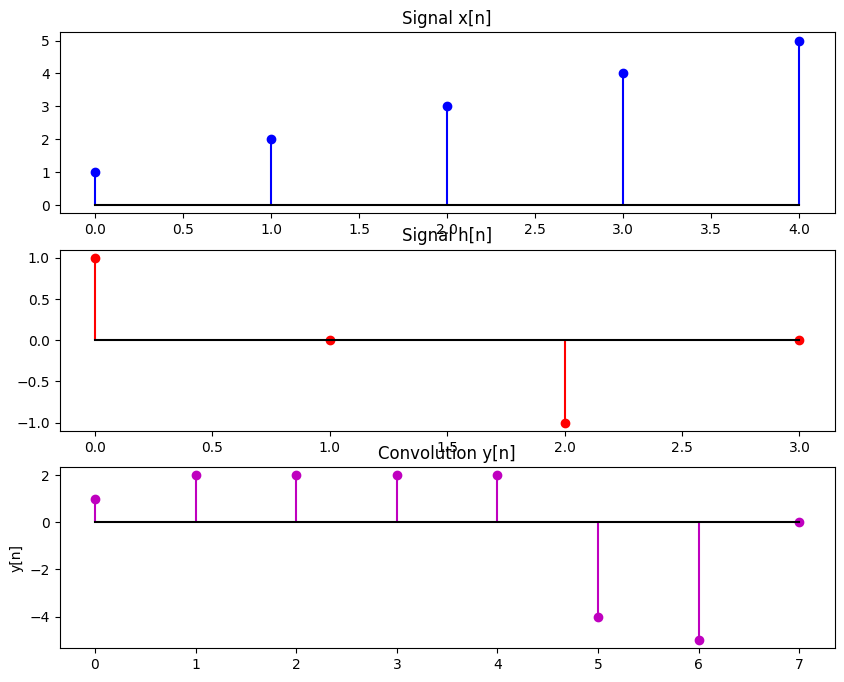

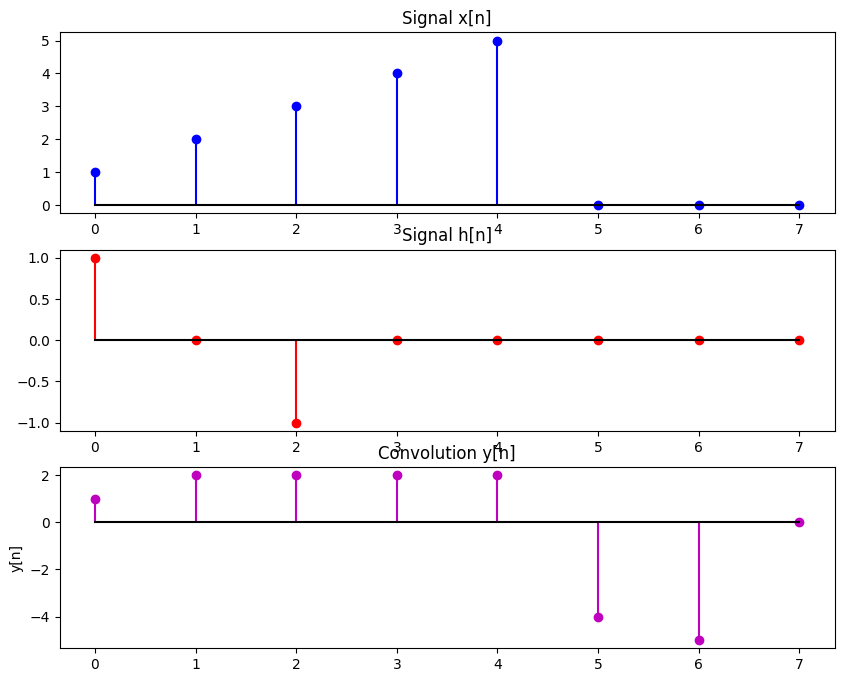

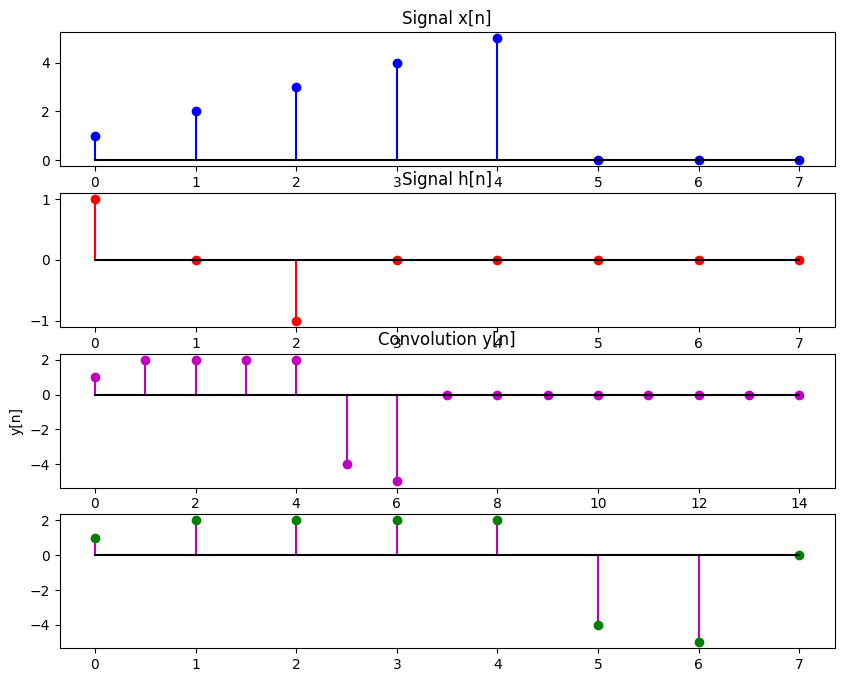

In [21]:
# Create a signal of size N and other of size M, after plot both and the result of the convolution

import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as signal

x= np.array([1, 2, 3, 4, 5])
h= np.array([1, 0, -1, 0])

y = np.convolve(x, h)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].stem(x, basefmt='k', linefmt='b-', markerfmt='bo')
axs[0].set_title('Signal x[n]')


axs[1].stem(h, basefmt='k', linefmt='r-', markerfmt='ro')
axs[1].set_title('Signal h[n]')

axs[2].stem(y, basefmt='k', linefmt='m-', markerfmt='mo')
axs[2].set_title('Convolution y[n]')

axs[2].set_ylabel('y[n]')

L = len(x) + len(h) - 1
x_padding = np.pad(x, (0, (L - len(x))), 'constant')
h_padding = np.pad(h, (0, L - len(h)), 'constant')
y_circ = convolucion_circular(x_padding, h_padding)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].stem(x_padding, basefmt='k', linefmt='b-', markerfmt='bo')
axs[0].set_title('Signal x[n]')


axs[1].stem(h_padding, basefmt='k', linefmt='r-', markerfmt='ro')
axs[1].set_title('Signal h[n]')

axs[2].stem(y_circ, basefmt='k', linefmt='m-', markerfmt='mo')
axs[2].set_title('Convolution y[n]')

axs[2].set_ylabel('y[n]')



y = np.convolve(x_padding, h_padding)

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
axs[0].stem(x_padding, basefmt='k', linefmt='b-', markerfmt='bo')
axs[0].set_title('Signal x[n]')


axs[1].stem(h_padding, basefmt='k', linefmt='r-', markerfmt='ro')
axs[1].set_title('Signal h[n]')

axs[2].stem(y, basefmt='k', linefmt='m-', markerfmt='mo')
axs[3].stem(y[:L], basefmt='k', linefmt='m-', markerfmt='go')
axs[2].set_title('Convolution y[n]')

axs[2].set_ylabel('y[n]')

print(y_circ -y[:L] )